1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris() # Задаем в переменную

In [3]:
print(iris.DESCR) # Выводим информацию о датасете

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data = pd.DataFrame(iris.data, columns=iris.feature_names) # Создаем датафрейм
variety = iris.target # Создаем целевую переменную

In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [6]:
data = data.drop(['petal length (cm)', 'petal width (cm)'], axis=1) # Удаляем лишние столбцы
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


3. Разделите данные на выборку для обучения и тестирования

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25) # Разделяем наши данные

4. Постройте модель LDA

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Импортируем LDA-функционал

In [9]:
lda = LinearDiscriminantAnalysis()

In [10]:
lda.fit(X_train, y_train) # Обучаем данные

LinearDiscriminantAnalysis()

In [11]:
lda.predict(X_test) # Делаем прогноз на тестовой выборке

array([0, 0, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 0])

In [12]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T # Смотрим разницу факта и прогноза
result

,0,1
0,0,0
1,0,0
2,1,1
3,2,2
4,1,1
5,1,2
6,1,1
7,1,1
8,1,1
9,1,2


In [13]:
variety # Классы сбалансированны

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_test, lda.predict(X_test)) # Проверяем точность прогнозов модели

0.8157894736842105

In [16]:
lda.coef_ # Коэффициенты дискриминатных линий

array([[-6.07078678,  7.60775858],
       [ 1.76786642, -3.59179829],
       [ 4.12758769, -3.902111  ]])

5. Визуализируйте предсказания для тестовой выборки и центры классов

In [17]:
lda.means_ # Смотрим центроиды

array([[5.01621622, 3.45135135],
       [5.99166667, 2.76666667],
       [6.58717949, 2.95897436]])

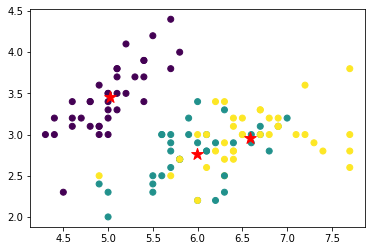

In [18]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [19]:
data # Целевая переменная и так находится в иной переменной, т.е. отделена от нашего датасета

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

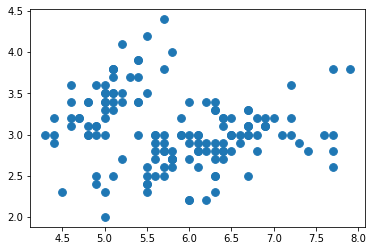

In [20]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], cmap='autumn', s=60)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
data_scaled = scaler.fit_transform(data) # Fit-transform сразу обучается и преобразует данные

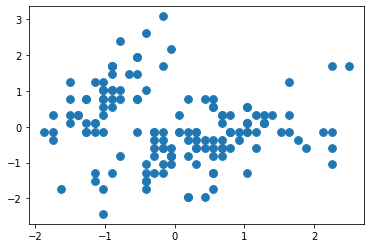

In [24]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1],cmap='autumn', s=60)

In [25]:
from sklearn.cluster import KMeans

In [26]:
k_inertia = [] # Cоздаем список для инерции
ks = range(1, 20) # Pадаем диапазон кластеров

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled)
    k_inertia.append(clf_kmeans.inertia_) # Добавляем инерцию каждой модели в список

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


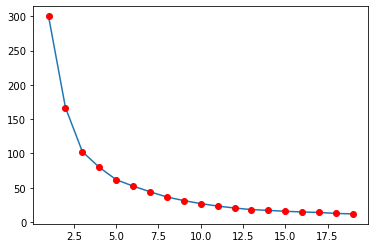

In [27]:
plt.plot(ks, k_inertia) # Cтроим график локтя
plt.plot(ks, k_inertia ,'ro') # По графику видно, что у нас есть 3 кластера

In [28]:
kmeans = KMeans(n_clusters=3) # Явно указываем количество кластеров
clusters = kmeans.fit_predict(data_scaled) # Fit_predict обучается на данных и каждому объекту присваивает кластер
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

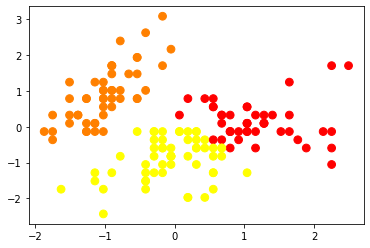

In [29]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], cmap='autumn', c=clusters, s=60)